In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

sns.set_palette('cubehelix')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [9]:
with open('/Users/Stephen/Desktop/may_2018_with_counts.pickle', 'rb') as pik:
    data = pickle.load(pik)
    
df = pd.DataFrame(data)

In [10]:
df.head(20)

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598847,2235829,2018-04-28 00:00:00,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598864,2235830,2018-04-28 04:00:00,Saturday,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598880,2235863,2018-04-28 08:00:00,Saturday,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598961,2235955,2018-04-28 12:00:00,Saturday,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6599175,2236015,2018-04-28 16:00:00,Saturday,214.0,60.0,274.0
5,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6599456,2236074,2018-04-28 20:00:00,Saturday,281.0,59.0,340.0
6,A002,R051,02-00-00,59 ST,BMT,04/29/2018,REGULAR,6599584,2236102,2018-04-29 00:00:00,Sunday,128.0,28.0,156.0
7,A002,R051,02-00-00,59 ST,BMT,04/29/2018,REGULAR,6599593,2236106,2018-04-29 04:00:00,Sunday,9.0,4.0,13.0
8,A002,R051,02-00-00,59 ST,BMT,04/29/2018,REGULAR,6599603,2236123,2018-04-29 08:00:00,Sunday,10.0,17.0,27.0
9,A002,R051,02-00-00,59 ST,BMT,04/29/2018,REGULAR,6599689,2236180,2018-04-29 12:00:00,Sunday,86.0,57.0,143.0


In [11]:
df.drop(['ENTRIES','EXITS'],axis = 1, inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 00:00:00,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 04:00:00,Saturday,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 08:00:00,Saturday,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 12:00:00,Saturday,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 16:00:00,Saturday,214.0,60.0,274.0


In [12]:
df['WEEKDAY_NUM'] = [day.weekday() for day in df['DATETIME']]
df.sort_values('WEEKDAY_NUM', inplace=True)
weekdays = df.groupby(['WEEKDAY_NUM','WEEKDAY']).sum()
weekdays.reset_index(inplace = True)

weekdays

,WEEKDAY_NUM,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,0,Monday,23123375.0,17319486.0,40442861.0
1,1,Tuesday,24618224.0,18504119.0,43122343.0
2,2,Wednesday,24894589.0,18747748.0,43642337.0
3,3,Thursday,24892911.0,18727650.0,43620561.0
4,4,Friday,24038302.0,18252680.0,42290982.0
5,5,Saturday,13182721.0,10660855.0,23843576.0
6,6,Sunday,10741112.0,8738102.0,19479214.0


In [19]:
df['TIME'] = [day.time() for day in df['DATETIME']]
df['HOUR'] = [time.hour for time in df['TIME']]
df.sort_values(['STATION','WEEKDAY'])

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY,WEEKDAY_NUM,TIME,HOUR
30481,H008,R248,01-00-01,1 AV,BMT,05/04/2018,REGULAR,2018-05-04 00:00:00,Friday,212.0,908.0,1120.0,4,00:00:00,0
30625,H008,R248,01-00-00,1 AV,BMT,05/25/2018,REGULAR,2018-05-25 00:00:00,Friday,85.0,948.0,1033.0,4,00:00:00,0
30408,H008,R248,01-00-01,1 AV,BMT,05/18/2018,REGULAR,2018-05-18 00:00:00,Friday,245.0,913.0,1158.0,4,00:00:00,0
30382,H008,R248,01-00-01,1 AV,BMT,05/11/2018,REGULAR,2018-05-11 00:00:00,Friday,217.0,913.0,1130.0,4,00:00:00,0
30324,H007,R248,00-03-02,1 AV,BMT,05/18/2018,REGULAR,2018-05-18 00:00:00,Friday,146.0,21.0,167.0,4,00:00:00,0
30298,H007,R248,00-03-02,1 AV,BMT,05/11/2018,REGULAR,2018-05-11 00:00:00,Friday,114.0,7.0,121.0,4,00:00:00,0
30340,H008,R248,01-00-00,1 AV,BMT,05/11/2018,REGULAR,2018-05-11 00:00:00,Friday,90.0,1064.0,1154.0,4,00:00:00,0
30583,H007,R248,00-03-02,1 AV,BMT,05/25/2018,REGULAR,2018-05-25 00:00:00,Friday,122.0,14.0,136.0,4,00:00:00,0
30450,H008,R248,01-00-02,1 AV,BMT,05/18/2018,REGULAR,2018-05-18 00:00:00,Friday,510.0,606.0,1116.0,4,00:00:00,0
30508,H008,R248,01-00-04,1 AV,BMT,05/11/2018,REGULAR,2018-05-11 00:00:00,Friday,1096.0,66.0,1162.0,4,00:00:00,0


In [21]:
df.groupby('HOUR').count()


,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY,WEEKDAY_NUM,TIME
HOUR,,,,,,,,,,,,,,
0,71558,71558,71558,71558,71558,71558,71558,71558,71558,69026,69026,69026,71558,71558
1,50525,50525,50525,50525,50525,50525,50525,50525,50525,48687,48687,48687,50525,50525
2,5756,5756,5756,5756,5756,5756,5756,5756,5756,5527,5527,5527,5756,5756
3,3219,3219,3219,3219,3219,3219,3219,3219,3219,3133,3133,3133,3219,3219
4,72392,72392,72392,72392,72392,72392,72392,72392,72392,72383,72383,72383,72392,72392
5,50801,50801,50801,50801,50801,50801,50801,50801,50801,50797,50797,50797,50801,50801
6,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783
7,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402
8,71535,71535,71535,71535,71535,71535,71535,71535,71535,71534,71534,71534,71535,71535


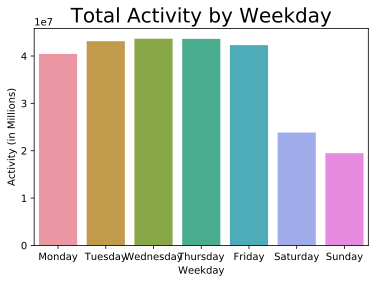

In [208]:
sns.barplot(x = 'WEEKDAY', y = 'TOTAL_ACTIVITY', data = weekdays)

plt.title('Total Activity by Weekday', {'fontsize': 20})
plt.xlabel('Weekday')
plt.ylabel('Activity (in Millions)')

plt.savefig('presentation/figures/activity_by_weekday.svg')

In [14]:
df.sort_values(['STATION','WEEKDAY_NUM'], inplace=True)
stations_by_weekday = df.groupby(['STATION','WEEKDAY_NUM','WEEKDAY']).sum()
stations_by_weekday.reset_index(inplace = True)
stations_by_weekday.sort_values(['STATION','TOTAL_ACTIVITY'], ascending=False, inplace=True)
stations_by_weekday = stations_by_weekday.groupby('STATION').first()
stations_by_weekday.sort_values('TOTAL_ACTIVITY', ascending=False, inplace = True)
stations_by_weekday.head(10)

,WEEKDAY_NUM,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
STATION,,,,,
34 ST-PENN STA,3,Thursday,708436.0,592952.0,1301388.0
GRD CNTRL-42 ST,2,Wednesday,654426.0,595243.0,1249669.0
34 ST-HERALD SQ,3,Thursday,531444.0,459411.0,990855.0
23 ST,2,Wednesday,529006.0,378054.0,907060.0
TIMES SQ-42 ST,3,Thursday,435048.0,394918.0,829966.0
14 ST-UNION SQ,2,Wednesday,446567.0,379658.0,826225.0
FULTON ST,3,Thursday,424879.0,349010.0,773889.0
42 ST-PORT AUTH,4,Friday,406652.0,313283.0,719935.0
86 ST,2,Wednesday,369763.0,300603.0,670366.0


In [15]:
stations_by_weekday_busiest = stations_by_weekday.head(100)
stations_by_weekday_busiest = stations_by_weekday_busiest.groupby(['WEEKDAY_NUM','WEEKDAY']).count()
stations_by_weekday_busiest.reset_index(inplace = True)
stations_by_weekday_busiest.set_index(['WEEKDAY_NUM'],inplace=True)
stations_by_weekday_busiest.sort_values(['WEEKDAY_NUM'], inplace=True)
stations_by_weekday_busiest

,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
WEEKDAY_NUM,,,,
0,Monday,1,1,1
1,Tuesday,13,13,13
2,Wednesday,37,37,37
3,Thursday,28,28,28
4,Friday,21,21,21


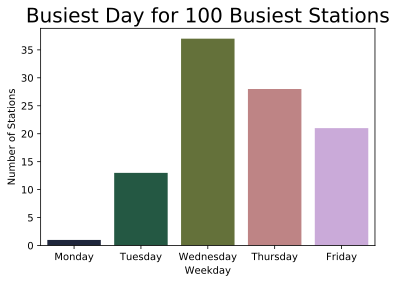

In [209]:


sns.barplot(x = 'WEEKDAY', y = 'TOTAL_ACTIVITY', data=stations_by_weekday_busiest)
plt.xlabel('Weekday')
plt.ylabel('Number of Stations')
plt.title('Busiest Day for 100 Busiest Stations', fontdict={'fontsize': 20})

plt.savefig('presentation/figures/busiest_days.svg')

In [142]:
df.sort_values(['STATION','WEEKDAY_NUM'], inplace=True)
busiest_station_days = df.groupby(['STATION','WEEKDAY_NUM','WEEKDAY']).sum()
busiest_station_days.sort_values(['TOTAL_ACTIVITY'], ascending=False, inplace=True)
busiest_station_days = busiest_station_days.head(100)
busiest_station_days = busiest_station_days.groupby(['STATION']).count()
busiest_station_days.sort_values

,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
STATION,,,
125 ST,5,5,5
14 ST,4,4,4
14 ST-UNION SQ,7,7,7
23 ST,5,5,5
34 ST-HERALD SQ,7,7,7
34 ST-PENN STA,7,7,7
42 ST-PORT AUTH,7,7,7
47-50 STS ROCK,5,5,5
59 ST,5,5,5


In [140]:
df.groupby(['STATION']).count()

,C/A,UNIT,SCP,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY,WEEKDAY_NUM,TIME
STATION,,,,,,,,,,,,,
1 AV,1680,1680,1680,1680,1680,1680,1680,1680,1670,1670,1670,1680,1680
103 ST,2583,2583,2583,2583,2583,2583,2583,2583,2568,2568,2568,2583,2583
103 ST-CORONA,1519,1519,1519,1519,1519,1519,1519,1519,1510,1510,1510,1519,1519
104 ST,1516,1516,1516,1516,1516,1516,1516,1516,1507,1507,1507,1516,1516
110 ST,1005,1005,1005,1005,1005,1005,1005,1005,999,999,999,1005,1005
111 ST,2711,2711,2711,2711,2711,2711,2711,2711,2695,2695,2695,2711,2711
116 ST,3694,3694,3694,3694,3694,3694,3694,3694,3672,3672,3672,3694,3694
116 ST-COLUMBIA,1007,1007,1007,1007,1007,1007,1007,1007,1001,1001,1001,1007,1007
121 ST,840,840,840,840,840,840,840,840,835,835,835,840,840


In [134]:
busiest_stations = df.groupby('STATION').sum().sort_values('TOTAL_ACTIVITY', ascending=False).head(10)

In [119]:
stations_by_weekday.head(10)

,WEEKDAY_NUM,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
STATION,,,,,
34 ST-PENN STA,3,Thursday,708436.0,592952.0,1301388.0
GRD CNTRL-42 ST,2,Wednesday,654426.0,595243.0,1249669.0
34 ST-HERALD SQ,3,Thursday,531444.0,459411.0,990855.0
23 ST,2,Wednesday,529006.0,378054.0,907060.0
TIMES SQ-42 ST,3,Thursday,435048.0,394918.0,829966.0
14 ST-UNION SQ,2,Wednesday,446567.0,379658.0,826225.0
FULTON ST,3,Thursday,424879.0,349010.0,773889.0
42 ST-PORT AUTH,4,Friday,406652.0,313283.0,719935.0
86 ST,2,Wednesday,369763.0,300603.0,670366.0


In [122]:
df

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY,WEEKDAY_NUM
30486,H008,R248,01-00-04,1 AV,BMT,05/07/2018,REGULAR,2018-05-07 08:00:00,Monday,190.0,143.0,333.0,0
30476,H007,R248,00-03-00,1 AV,BMT,05/21/2018,REGULAR,2018-05-21 04:00:00,Monday,9.0,12.0,21.0,0
30218,H007,R248,00-03-00,1 AV,BMT,05/14/2018,REGULAR,2018-05-14 08:00:00,Monday,96.0,183.0,279.0,0
30336,H007,R248,00-03-01,1 AV,BMT,04/30/2018,REGULAR,2018-04-30 20:00:00,Monday,239.0,63.0,302.0,0
30220,H007,R248,00-03-00,1 AV,BMT,05/14/2018,REGULAR,2018-05-14 16:00:00,Monday,290.0,284.0,574.0,0
30221,H007,R248,00-03-00,1 AV,BMT,05/14/2018,REGULAR,2018-05-14 20:00:00,Monday,296.0,278.0,574.0,0
30331,H007,R248,00-03-01,1 AV,BMT,04/30/2018,REGULAR,2018-04-30 00:00:00,Monday,55.0,25.0,80.0,0
30332,H007,R248,00-03-01,1 AV,BMT,04/30/2018,REGULAR,2018-04-30 04:00:00,Monday,4.0,7.0,11.0,0
30333,H007,R248,00-03-01,1 AV,BMT,04/30/2018,REGULAR,2018-04-30 08:00:00,Monday,79.0,42.0,121.0,0
30335,H007,R248,00-03-01,1 AV,BMT,04/30/2018,REGULAR,2018-04-30 16:00:00,Monday,205.0,105.0,310.0,0


In [45]:
unique_stations = stations_by_weekday['STATION'].unique()
values = ['Monday' for x in unique_stations]
greatest_by_station = dict(zip(unique_stations, values))

print(len(greatest_by_station))

375
